In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#from cuml.manifold import TSNE
import altair as alt

from sklearn.datasets import make_classification
#import imblearn
from matplotlib import pyplot as plt

Let us first create some example imbalanced data.

In [3]:
X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=1000, random_state=10
)
df = pd.DataFrame(X)
df['target'] = y

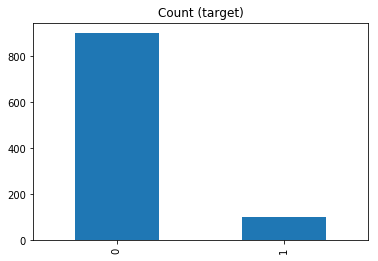

In [4]:
count = df.target.value_counts()
count.plot(kind='bar', title='Count (target)');

In [5]:
def plot_multidimensional(X, y):
    
    x_pca  = PCA(n_components=2).fit_transform(X)  # Compute PCA
    x_tsne = TSNE(random_state=0).fit_transform(X) # Compute TSNE
    
    df = pd.DataFrame({'pca1': x_pca[:, 0],  'pca2': x_pca[:, 1],
                      'tsne1': x_tsne[:, 0], 'tsne2': x_tsne[:, 1],
                      "y": y})
    
    brush = alt.selection(type='interval', resolve='global')
    
    scatter = alt.Chart(df).mark_circle().encode(
        color=alt.condition(brush, 'y:N', alt.ColorValue('lightgray')),
    ).add_selection(
        brush
    ).properties(
        width=250,
        height=250
    )
    
    bars = alt.Chart(df).mark_bar().encode(
        x='y:N', 
        y='count(y):Q',
        color='y:N',
    ).transform_filter(
        brush
    ).properties(
        width=250,
        height=250
    )

    return scatter.encode(x='pca1', y='pca2') | scatter.encode(x='tsne1', y='tsne2') | bars

plot_multidimensional(X, y)

alt.HConcatChart(...)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_multidimensional(X_sm, y_sm)

In [6]:
from sklearn.datasets import load_digits

In [7]:
X_dig, y_dig = load_digits(n_class=5, return_X_y=True)
plot_multidimensional(X_dig, y_dig)

alt.HConcatChart(...)

In [14]:
X_dig, y_dig = load_digits(n_class=10, return_X_y=True)
plot_multidimensional(X_dig, y_dig)

alt.HConcatChart(...)

In [74]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
plot_multidimensional(X, y)